<a href="https://colab.research.google.com/github/Arghya-Bandyopadhyay30/Content-Based-Music-Recommendation/blob/main/Content_Based_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Kaggle Link: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset

### **Music Recommender System**

**There are two main types of recommender systems:**
1.   Content-Based Filters
2.   Collaborative Filters

In [ ]:
#Importing Basic Required Libraries
import numpy as np
import pandas as pd

In [ ]:
#The dataset contains name, artist and lyrics for 57650 songs in English. 
data = pd.read_csv("spotify_millsongdata.csv")

data.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [ ]:
#Number of Attributes/ Characteristics = 4
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [ ]:
#The dataset does not contain any missing value. 
data.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [ ]:
data.shape

(57650, 4)

In [ ]:
#57650 requires a lot of RAM so let as work with 3000 songs sample
data = data.sample(n=3000).reset_index(drop=True)

#Remove the \n and \r in the 'text' attribute
data['text'] = data['text'].str.replace(r'\n', '', regex=True)
data['text'] = data['text'].str.replace(r'\r', '', regex=True)

data

,artist,song,link,text
0,Stevie Wonder,Golden Lady,/s/stevie+wonder/golden+lady_20131811.html,Looking in your eyes Kind of heaven eyes Clo...
1,Gary Numan,Sister Surprise,/g/gary+numan/sister+surprise_20058578.html,We are Walking nostalgia Like old movies for...
2,Hooverphonic,Waves,/h/hooverphonic/waves_10142652.html,These gigantic waves just take me To an unkno...
3,Marianne Faithfull,Southern Butterfly,/m/marianne+faithfull/southern+butterfly_20088...,Where I walk And life is warm Sun and breath...
4,Chuck Berry,Rain Eyes,/c/chuck+berry/rain+eyes_20514560.html,Rain eyes that blur the rays of sunshine When...
...,...,...,...,...
2995,Snoop Dogg,Dogg Named Snoop,/s/snoop+dogg/dogg+named+snoop+feat+trey+deee_...,[Chorus : Tray Deee and Snoop Dogg] Motherfuc...
2996,Sting,I Burn For You,/s/sting/i+burn+for+you_20132029.html,Now that I have found you In the cool'th of y...
2997,Harry Belafonte,Close Your Eyes,/h/harry+belafonte/close+your+eyes_20170154.html,Close your eyes Rest your head on my shoulder...
2998,George Michael,Move On,/g/george+michael/move+on_20059332.html,I've been in and out of favor with lady luck ...


### **TF-IDF a technique used for information retrieval.**

***Algorithm:***
1.   Find the score for TF and IDF for each term in the document
2.   Product of TF and IDF
3.   Product is the TF-IDF weight of that term

In [ ]:
#Using TF-IDF vectorizerthat calculates the TF-IDF score for each 
#song lyric, word-by-word
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer='word', stop_words='english')

In [ ]:
#Lyric Matrix containing each word with its TF_IDF score
lyrics_matrix = tfidf.fit_transform(data['text'])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity of each item with every other item in the dataset
cosineMatrix = cosine_similarity(lyrics_matrix) 

In [ ]:
#50 similar songs dataset
similarities = {}

In [ ]:
for i in range(len(cosineMatrix)):

    #Sort in ascending order for each element in cosineMatrix and 
    #get the last 50 indexes of the songs (most similar)
    similarIndices = cosineMatrix[i].argsort()[:-50:-1] 

    #For each song we store the amost 50 similar songs (excluding itself 
    #thus [1:]) with the details:
    #1. Value of the Cosine Matrix 
    #2. Name of the Song
    #3. Name of the Artist
    #4. Link of the Song
    similarities[data['song'].iloc[i]] = [(cosineMatrix[i][x], data['song'][x], data['artist'][x], data['link'][x]) for x in similarIndices][1:]

In [ ]:
class ContentBasedRecommender:
  #Parameterized Constructor
  def __init__(self, matrix):
    self.similarMatrix = matrix

  def _print_message(self, song, recomSong, recomNumber):
    print(f'The {recomNumber} recommended songs for \"{song}\" are:\n')
    
    for i in range(recomNumber):
      print(f"Song {i+1}: {recomSong[i][1]}")
      print(f"Artist: {recomSong[i][2]}")
      print(f"Link: {recomSong[i][3]}")
      print(f"Similarity Score: {round(recomSong[i][0], 3)}")
      print("--------------------\n")

  def recommend(self, recommendation):
    #Retrieving the Name of Song
    songName = recommendation['songName']

    #Number of recommend song
    numberSongs = recommendation['numberSongs']

    #Get the number of required similar songs from 'similarities' dataset
    recomendedSongs = self.similarMatrix[songName][:numberSongs]
    
    # print each item
    self._print_message(songName, recomendedSongs, numberSongs)

In [ ]:
##Initiate Class
recommedations = ContentBasedRecommender(similarities)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def create_heatmap(similarity, cmap = "YlGnBu"):
  df = pd.DataFrame(similarity)
  df.columns = data[:10]['song']
  df.index = data[:10]['song']
  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(df, cmap=cmap)

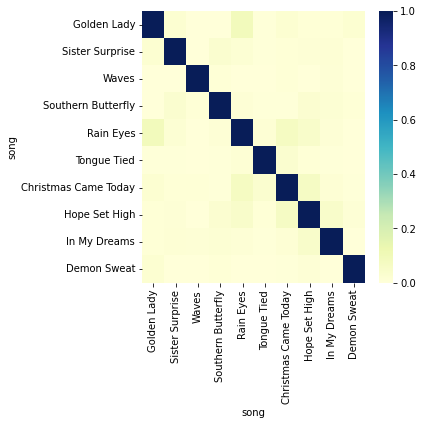

In [ ]:
create_heatmap(similarity=cosineMatrix[:10, :10])

In [ ]:
songs_list = data['song'].tolist()
songs_list[:5]

['Golden Lady', 'Sister Surprise', 'Waves', 'Southern Butterfly', 'Rain Eyes']

In [ ]:
name = input("Enter your Song Name: ")
num = int(input("Number of Recommended Songs: "))

Enter your Song Name: Golden Lady
Number of Recommended Songs: 3


In [ ]:
recommendation = {
    "songName": name,
    "numberSongs": num
}

recommedations.recommend(recommendation)

The 3 recommended songs for "Golden Lady" are:

Song 1: Lady Luck
Artist: Deep Purple
Link: /d/deep+purple/lady+luck_20038724.html
Similarity Score: 0.372
--------------------

Song 2: Baby Lady
Artist: Justin Bieber
Link: /j/justin+bieber/baby+lady_20467491.html
Similarity Score: 0.28
--------------------

Song 3: Golden Boy
Artist: Bob Seger
Link: /b/bob+seger/golden+boy_20021936.html
Similarity Score: 0.264
--------------------

